In [19]:
import ipyvuetify as v
import ipywidgets as widgets
import qgrid
import base64
import pandas as pd
import numpy as np
import time
import webbrowser

In [20]:
import ipyvuetify as v

df.to_excel('/tmp/data.xlsx')
b = v.Btn(children=['Button'])
b.href = 'http://datascience-research:5005/data.xlsx'""
b

Btn(children=['Button'], href='http://datascience-research:5005/data.xlsx')

In [4]:
b = v.Btn(children=['Button'])
b2 = v.Btn(children = ['Apple'], flat=True)
b3 = v.Btn(icon = True, children = [v.Icon(children=['cloud_download'])])
b4 = v.Btn(icon = True, slot='activator', children = [v.Icon(children=['cloud_download'])])

In [5]:
b.block = False
b.loading = False

In [6]:
def clicked(widget, event, data):
    print(widget)
    print(event)
    print(data)

In [7]:
b.on_event('click', clicked)
b2.href = "https://www.apple.com"

In [8]:
df = pd.DataFrame(np.random.rand(10,25))

In [9]:
csv = df.to_csv()
b64 = base64.b64encode(csv.encode())
payload = b64.decode()
href = f'data:text/csv;base64,{payload}'
b3.href = href
b3.href = 'http://datascience-research:5005/data.xlsx'
html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'

In [10]:
html

'<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'

In [11]:
import webbrowser
webbrowser.open('http://example.com')

False

In [12]:
# from IPython.display import Javascript

# def download(df):
#     js_download = """
#     var csv = '%s';

#     var filename = 'results.csv';
#     var blob = new Blob([csv], { type: 'text/csv;charset=utf-8;' });
#     if (navigator.msSaveBlob) { // IE 10+
#         navigator.msSaveBlob(blob, filename);
#     } else {
#         var link = document.createElement("a");
#         if (link.download !== undefined) { // feature detection
#             // Browsers that support HTML5 download attribute
#             var url = URL.createObjectURL(blob);
#             link.setAttribute("href", url);
#             link.setAttribute("download", filename);
#             link.style.visibility = 'hidden';
#             document.body.appendChild(link);
#             link.click();
#             document.body.removeChild(link);
#         }
#     }
#     """ % df.to_csv(index=False).replace('\n','\\n').replace("'","\'")
# Javascript(js_download)

In [13]:
b = widgets.Button(description='My Button')

In [14]:
import base64
import pandas as pd
from IPython.display import HTML

def create_download_link( df, title = "Download CSV file", filename = "data.csv"):
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

df = pd.DataFrame(data = [[1,2],[3,4]], columns=['Col 1', 'Col 2'])
create_download_link(df)

In [15]:
df.to_excel('/tmp/data.xlsx')

In [16]:
# This doesn't work becuase the file is on the server file system, not the local!
def send_to_excel(widget, event, data):
    widget.loading = True
    df.to_excel('/tmp/data.xlsx')
    #url = 'file:///tmp/served/data.xlsx'
    url = 'http://datascience-research:5005/data.xlsx'
    webbrowser.open(url)
    time.sleep(2)
    widget.loading = False

b4.on_event('click', send_to_excel)

In [17]:
# wrap in a Layout, otherwise it fills the space
v.Layout(children=[
    b,
    b2,
    b3,
    v.Tooltip(bottom=True, children=[
        b4,
        'Download Excel Sheet'
    ])
])

Layout(children=[Button(description='My Button', style=ButtonStyle()), Btn(children=['Apple'], flat=True, href…

In [18]:
v.Tooltip(bottom=True, children=[
        b4,
        'Download Excel Sheet'
    ])

Tooltip(bottom=True, children=[Btn(children=[Icon(children=['cloud_download'])], icon=True, slot='activator'),…

In [18]:
v.Card(elevation=10, ripple=True, children=[b], dark=True, flat=False)

Card(children=[Button(description='My Button', style=ButtonStyle())], dark=True, elevation=10.0, flat=False, r…

# bqplot

In [19]:
# add a bqplot
from bqplot import pyplot as plt
import numpy as np

In [20]:
plt.clear()
plt.figure(1, title='')
n = 200
x = np.linspace(0.0, 10.0, n)
y = np.cumsum(np.random.randn(n))
plt.plot(x, y)
plt.show(display_toolbar=False)

Figure(axes=[Axis(scale=LinearScale()), Axis(orientation='vertical', scale=LinearScale())], fig_margin={'top':…

# seaborn plot

In [21]:
# add a seaborn plot, does it fill the card?



In [22]:
#!pip install --upgrade seaborn

In [23]:
#sns.set(style="darkgrid")




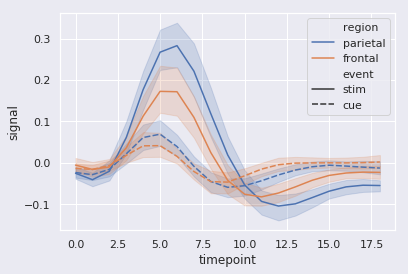

In [24]:
import ipyvuetify as v
import ipywidgets as widgets
import matplotlib.pyplot as plt
import seaborn as sns
sns.axes_style("darkgrid")
sns.set(rc={'figure.facecolor':'#EAEAF2'})
fmri = sns.load_dataset("fmri")
fig = sns.lineplot(x="timepoint", y="signal", hue="region", style="event", data=fmri)
plt.savefig('/tmp/output.svg', format='svg');
plt.savefig('/tmp/output.png', format='png', dpi=300);

In [25]:
file = open("/tmp/output.jpg", "rb")
image = file.read()
img = widgets.Image(value=image, format='jpg')

In [26]:
vepc1 = v.ExpansionPanelContent(children=[
    v.Html(tag='div', slot='header', children=['Plot Header']),
    v.Card(children=[
        v.CardMedia(children=[img]),
        v.CardActions(children=[v.Btn(children=['Button'], color='orange', flat=True)])
    ], dark=False)
   ])
vep = v.ExpansionPanel(children=[vepc1])
vl = v.Layout(children=[vep])
vl

Layout(children=[ExpansionPanel(children=[ExpansionPanelContent(children=[Html(children=['Plot Header'], slot=…

In [27]:
??v.CardMedia

In [20]:
toggle_single = v.BtnToggle(v_model=2, class_='mr-3', children=[
    v.Btn(flat=True, children=[v.Icon(children=['format_align_left'])]),
    v.Btn(flat=True, children=[v.Icon(children=['format_align_center'])]),
    v.Btn(flat=True, children=[v.Icon(children=['format_align_right'])]),
    v.Btn(flat=True, children=[v.Icon(children=['format_align_justify'])]),
])
toggle_single

BtnToggle(children=[Btn(children=[Icon(children=['format_align_left'])], flat=True), Btn(children=[Icon(childr…

In [21]:
# add a v-data-table with filter and download buttons :-)

In [28]:
import ipyvuetify as v
from traitlets import (Unicode, List)
import pandas as pd

df = pd.DataFrame([['Tom', 10], ['Nick', 15], ['Juli', 14]], columns = ['Name', 'Age'])
df

class MyDataTable(v.VuetifyTemplate):
    headers = List([
        {'text': 'Name', 'sortable':  False, 'value': 'Name'},
        {'text': 'Age', 'value': 'Age', 'align': 'right'}
    ]).tag(sync=True)

    items = List(df.to_dict(orient='records')).tag(sync=True)

    template = Unicode('''
        <v-data-table
            :headers="headers"
            :items="items"
            class="elevation-1"
        >
            <template v-slot:items="props">
                <td>{{ props.item.Name }}</td>
                <td class="text-xs-right">{{ props.item.Age }}</td>
            </template>
        </v-data-table>
    ''').tag(sync=True)

MyDataTable()

MyDataTable(headers=[{'text': 'Name', 'sortable': False, 'value': 'Name'}, {'text': 'Age', 'value': 'Age', 'al…

In [23]:
??v.VuetifyTemplate

In [24]:
v.Html( children=[df.to_html()])

Html(children=['<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <t…

In [25]:
qw = qgrid.show_grid(df)

In [26]:
qw

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [27]:
class MyCard(v.VuetifyTemplate):
    my_text = "Hello Jonathan"
    
    template = Unicode('''
        <template>
  <v-layout>
    <v-flex xs12 sm6 offset-sm3>
      <v-card>
        <v-img
          src="https://cdn.vuetifyjs.com/images/cards/desert.jpg"
          aspect-ratio="2.75"
        ></v-img>

        <v-card-title primary-title>
          <div>
            <h3 class="headline mb-0">Kangaroo Valley Safari</h3>
            <div> '''+my_text+''' </div>
          </div>
        </v-card-title>

        <v-card-actions>
          <v-btn flat color="orange">Share</v-btn>
          <v-btn flat color="orange">Explore</v-btn>
        </v-card-actions>
      </v-card>
    </v-flex>
  </v-layout>
</template>
    ''').tag(sync=True)

MyCard()

MyCard()

In [28]:
lorum_ipsum = 'Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.'

In [29]:
import bqplot
from bqplot import pyplot as plt
import numpy as np

n = 200

x = np.linspace(0.0, 10.0, n)
y = np.cumsum(np.random.randn(n)*10).astype(int)

fig = plt.figure( title='Histogram')
np.random.seed(0)
hist = plt.hist(y, bins=25)
hist.scales['sample'].min = float(y.min())
hist.scales['sample'].max = float(y.max())
fig.layout.width = 'auto'
fig.layout.height = 'auto'
fig.layout.min_height = '400px' # so it shows nicely in the notebook
fig

Figure(axes=[Axis(orientation='vertical', scale=LinearScale()), Axis(scale=LinearScale(max=12.0, min=-250.0))]…

In [29]:
v.Dialog(v_model=False, width='500', children=[
        v.Btn(slot="activator", color='success', dark=True, children=[
            "Open dialog"
        ]),
        v.Card(children=[
            v.CardMedia(children=[img]),
            v.CardTitle(class_='headline gray lighten-2', primary_title=True, children=[
                "Lorem ipsum"]),
            v.CardText(children=[
                lorum_ipsum])
        ])
    ])

NameError: name 'lorum_ipsum' is not defined

In [30]:
vepc1 = v.ExpansionPanelContent(children=[
    v.Html(tag='div', slot='header', children=['item1']),
    v.Card(children=[
        v.CardText(children=[img])])])

vepc2 = v.ExpansionPanelContent(children=[
    v.Html(tag='div', slot='header', children=['item2']),
    v.Card(children=[
        v.CardText(children=['Second Text'])])])

vep = v.ExpansionPanel(children=[vepc1, vepc2])
vl = v.Layout(children=[vep])
vl

Layout(children=[ExpansionPanel(children=[ExpansionPanelContent(children=[Html(children=['item1'], slot='heade…

In [32]:
def on_click(widget, event, data):
   vnd.v_model = not vnd.v_model

drawer_button = v.Btn(color='primary', children=['Close drawer'])
drawer_button.on_event('click', on_click)

vnd = v.NavigationDrawer(v_model=False, absolute=True, right=True, children=[
    drawer_button
])

show_drawer = v.Btn(color='primary', children=['Toggle drawer'])
show_drawer.on_event('click', on_click)

v.Layout(children=[vnd, show_drawer])

Layout(children=[NavigationDrawer(absolute=True, children=[Btn(children=['Close drawer'], color='primary')], r…

In [55]:
i = v.Img(src='http://datascience-research:5005/output.svg')

In [57]:
vepc1 = v.ExpansionPanelContent(children=[
    v.Html(tag='div', slot='header', children=['item1']),
    v.Card(children=[
        v.CardText(children=[i])])])

vepc2 = v.ExpansionPanelContent(children=[
    v.Html(tag='div', slot='header', children=['item2']),
    v.Card(children=[
        v.CardText(children=['Second Text'])])])

vep = v.ExpansionPanel(children=[vepc1, vepc2])
vl = v.Layout(children=[vep])
vl

Layout(children=[ExpansionPanel(children=[ExpansionPanelContent(children=[Html(children=['item1'], slot='heade…